In [5]:
##Random Forest Classifier

import spacy

nlp = spacy.load('es')


In [6]:
import os
from pandas import DataFrame, concat, read_csv
from numpy import isfinite

concat_df_labels = DataFrame()
cat_path = '../data/Categorizacion/'
for i in os.listdir(cat_path):
    print(cat_path + i)
    df_labels = read_csv(cat_path + i, sep=';', error_bad_lines=False)
    
    df_labels = df_labels[(df_labels['QUIEN'].astype(str) != '?')]
    df_labels['QUIEN'] = df_labels['QUIEN'].astype(float)
    
    df_labels['full_text'] = df_labels['full_text'].astype(str)
    
    df_labels['Asesinato'] = df_labels['Asesinato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Violacion'] = df_labels['Violacion'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Agresion \nsexual'] = df_labels['Agresion \nsexual'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Maltrato'] = df_labels['Maltrato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Acoso'] = df_labels['Acoso'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Miedo'] = df_labels['Miedo'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Asco\nTristeza\nRabia'] = df_labels['Asco\nTristeza\nRabia'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    
    df_labels = df_labels[['id','tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia', 'full_text']]
    df_labels.set_index('id', inplace=True)
    df_labels = df_labels[isfinite(df_labels['QUIEN'])]
    
    concat_df_labels = concat([concat_df_labels, df_labels], axis=0)

../data/Categorizacion/Vicenc-Tabla 1.csv
../data/Categorizacion/Feliu-Tabla 1.csv
../data/Categorizacion/Laura-Tabla 1.csv
../data/Categorizacion/Diana-Tabla 1.csv
../data/Categorizacion/Sol-Tabla 1.csv
../data/Categorizacion/Camilo-Tabla 1.csv
../data/Categorizacion/Guillermo-Tabla 1.csv
../data/Categorizacion/Cristina-Tabla 1.csv
../data/Categorizacion/Carlos_G-Tabla 1.csv
../data/Categorizacion/Luz-Tabla 1.csv
../data/Categorizacion/Maria-Tabla 1.csv
../data/Categorizacion/X_Vacio-Tabla 1.csv
../data/Categorizacion/Juan-Tabla 1.csv
../data/Categorizacion/Irene-Tabla 1.csv
../data/Categorizacion/Fer-Tabla 1.csv
../data/Categorizacion/Artur-Tabla 1.csv
../data/Categorizacion/David-Tabla 1.csv


In [28]:
def keep_meaningful_words(word):
    processed = nlp(word)
    result = [token.lemma_ for token in processed if token.pos_ in ('NOUN', 'VERB', 'ADJ', 'ADV')]
    return ' '.join(result)

random_tweet = df['full_text'].iloc[1000]
print(random_tweet)
print('-' * 30)
print(keep_meaningful_words(random_tweet))

concat_df_labels['filtered_text'] = concat_df_labels['full_text'].apply(keep_meaningful_words)

concat_df_labels.sample()

Cómo me duele este ht #cuéntalo
------------------------------
doler ht cuéntalo


,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text,filtered_text
id,,,,,,,,,,,,
9.915118e+17,"9,92E+17",Luz,3.0,0,0,0,0,0,0,1,Se me caen las lagrimas y se me hace un nudo e...,caer lagrimar hacer nudo garganta aliviar no s...


In [32]:
text_labels = ['Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia']

In [43]:
def get_category(x):
    if x['Asesinato']:
        return 0
    elif x['Violacion']:
        return 1
    elif x['Agresion \nsexual']:
        return 2
    elif x['Maltrato']:
        return 3
    elif x['Acoso']:
        return 4
    elif x['Miedo']:
        return 5
    elif x['Asco\nTristeza\nRabia']:
        return 6
    else:
        return 7

concat_df_labels['category'] = concat_df_labels[text_labels].apply(get_category, axis=1)
concat_df_labels['unlabeled'] = concat_df_labels['category'].apply(lambda x: 1 if x == 7 else 0)


In [44]:
# y : let's make category a number
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(concat_df_labels.category)
concat_df_labels['y'] = y

In [34]:
from pandas import read_pickle

df = read_pickle('../data/cuentalo_json_con_pais_ciudad_limpios.pkl')
df = df[df['tweet_type'] == 'original']

In [35]:
complex_sentence = df.full_text.values[8888]
processed = nlp(complex_sentence)
for token in processed:
    print(token.text, token.tag_)

me PRON__Number=Sing|Person=1|PronType=Prs
estaba AUX__Mood=Ind|Number=Sing|Person=3|Tense=Imp|VerbForm=Fin
haciendo VERB__VerbForm=Ger
un DET__Definite=Ind|Gender=Masc|Number=Sing|PronType=Art
masaje NOUN__Gender=Masc|Number=Sing
en ADP__AdpType=Prep
los DET__Definite=Def|Gender=Masc|Number=Plur|PronType=Art
pies NOUN__Gender=Masc|Number=Plur
y CCONJ___
me PRON__Number=Sing|Person=1
quedé VERB__Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin
dormida ADJ__Gender=Fem|Number=Sing|VerbForm=Part
. PUNCT__PunctType=Peri
me PRON__Number=Sing|Person=1
despierto VERB__Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin
y CCONJ___
me PRON__Number=Sing|Person=1|PronType=Prs
estaba AUX__Mood=Ind|Number=Sing|Person=3|Tense=Imp|VerbForm=Fin
penetrando VERB__VerbForm=Ger
. PUNCT__PunctType=Peri
era AUX__Mood=Ind|Number=Sing|Person=3|Tense=Imp|VerbForm=Fin
un DET__Definite=Ind|Gender=Masc|Number=Sing|PronType=Art
amigo NOUN__Gender=Masc|Number=Sing
# PROPN___
Cuentalo PROPN___


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

max_jokes_with_that_word = 300
vectorizer30 = CountVectorizer(max_df=max_jokes_with_that_word, max_features=30)
bag_of_words = vectorizer30.fit_transform(df[df['tweet_type'] == 'original'].full_text)
vectorizer30.get_feature_names()

['ascensor',
 'asesinada',
 'coger',
 'dinero',
 'esperaba',
 'feliz',
 'foto',
 'grave',
 'habla',
 'harta',
 'ho',
 'hospital',
 'our',
 'pasamos',
 'porq',
 'queria',
 'sacó',
 'salida',
 'sentó',
 'será',
 'sigan',
 'simple',
 'suficiente',
 'tocan',
 'vaig',
 'ven',
 'vestido',
 'violo',
 'vuelva',
 'íbamos']

In [37]:
from pandas import DataFrame
counted = DataFrame(bag_of_words.toarray(), index=df[df['tweet_type'] == 'original'].index, 
                    columns=vectorizer30.get_feature_names())
counted.head(30)

,ascensor,asesinada,coger,dinero,esperaba,feliz,foto,grave,habla,harta,...,sigan,simple,suficiente,tocan,vaig,ven,vestido,violo,vuelva,íbamos
tweet_id,,,,,,,,,,,,,,,,,,,,,
990380122082611200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990380024703447040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990380009549434882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990380001202761728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990379986564669441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990379895686598656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990379804422754304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990379799079215105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990379785770733568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
max_sentences_with_that_word = 300
vectorizer30 = CountVectorizer(max_df=max_sentences_with_that_word, max_features=500)
bag_of_words = vectorizer30.fit_transform(concat_df_labels.filtered_text)

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans = TfidfTransformer()

normalized_bag = tfidf_trans.fit_transform(bag_of_words)

# Display word importance
DataFrame(data=normalized_bag.toarray(), index=concat_df_labels.index, columns=vectorizer30.get_feature_names()).head(25)

,abajar,abrazar,abrir,abuelo,abuso,acabar,acerar,acercar,acompañar,acordar,...,violencia,vivo,vosotros,voz,vuestro,vía,víctima,yositecreo,último,único
id,,,,,,,,,,,,,,,,,,,,,
9.912126e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.910180e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.909857e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.909516e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.907996e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.903354e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.914427e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.908377e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9.908363e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [71]:
# TfidfVectorizer = CountVectorizer + TFidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=max_jokes_with_that_word, max_features=500)
bag_of_words = tfidf_vectorizer.fit_transform(concat_df_labels.filtered_text)

important_words = tfidf_vectorizer.get_feature_names()
', '.join(important_words)

base_score = concat_df_labels.category.value_counts() / df_labels.shape[0]

In [72]:
# Split products in train (75%) and test (25%)
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(200)
X = bag_of_words
list_train_scores = []
list_test_scores = []
kf = KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    base_score = 0.368421
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    list_train_scores.append(train_score)
    list_test_scores.append(test_score)

    print('Base score (all to "others"): {}'.format(base_score))
    print('Train set score: {}'.format(train_score))
    print('Test set score: {}'.format(test_score) )
    print('*' * 30)


Base score (all to "others"): 0.368421
Train set score: 0.958599275487321
Test set score: 0.5726112452569851
******************************
Base score (all to "others"): 0.368421
Train set score: 0.9613593237881662
Test set score: 0.5626077957916523
******************************
Base score (all to "others"): 0.368421
Train set score: 0.9596412556053812
Test set score: 0.5797101449275363
******************************


In [78]:
from sklearn.ensemble import RandomForestClassifier

number_of_trees = 200
clf = RandomForestClassifier(n_estimators=number_of_trees, random_state=1)
clf.fit(X_train, y_train)

base_score = (concat_df_labels.category.value_counts() / concat_df_labels.category.value_counts().sum())[7]
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Base score (all to "otros"): {}'.format(base_score))
print('Train set score: {}'.format(train_score))
print('Test set score: {}'.format(test_score) )

Base score (all to "otros"): 0.421918123275069
Train set score: 0.9596412556053812
Test set score: 0.5814354727398205


In [79]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = vectorizer30.get_feature_names(),
                                    columns=['importance']).sort_values('importance',ascending=False)

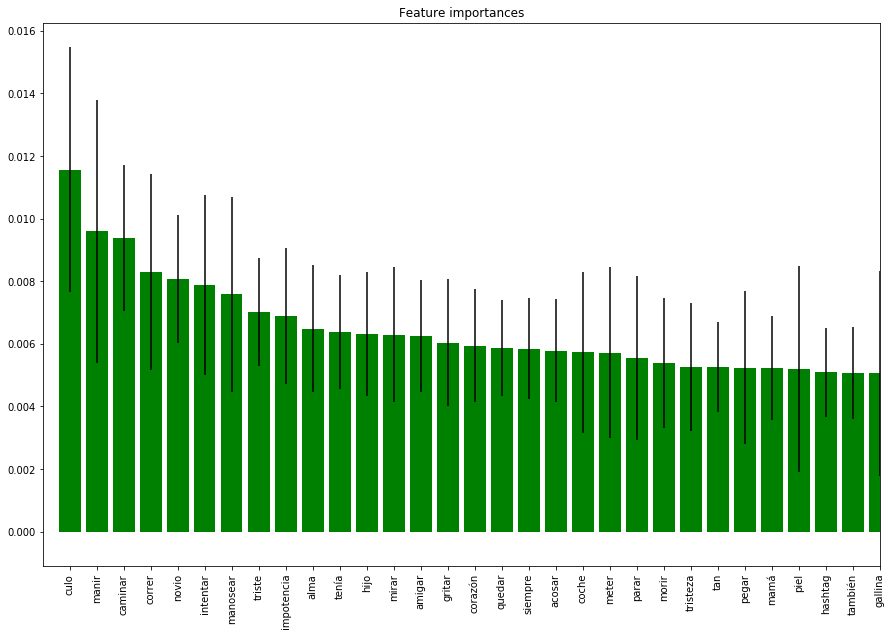

In [86]:
import matplotlib.pyplot as plt

# Plot the feature importances of the forest
plt.figure(figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [vectorizer30.get_feature_names()[i] for i in indices], rotation=90)
plt.xlim([-1, 30])
plt.show()

In [85]:
feature_importances

,importance
culo,0.010385
manir,0.009618
manosear,0.008570
correr,0.008409
intentar,0.008336
novio,0.008126
caminar,0.008011
mirar,0.006943
impotencia,0.006630
alma,0.006461
